# **ĐỒ ÁN TRỰC QUAN HÓA DỮ LIỆU**
**Môn học:** Trực quan hóa dữ liệu <br>
**Thành viên:** <br>
- Phùng Siêu Đạt - 21127243 <br>
- Đặng Hà Huy - 21127296

## **Mục lục**


* [I. Data understading](#c1)
  * [1. Đếm số dòng và số cột](#c11)
  * [2. Viết bảng mô tả về các cột](#c12)
  * [3. Lấy 5 điểm dữ liệu ra làm mẫu](#c13)
  * [4. Phân tích tỷ lệ missing rate](#c14)
  * [5. Phân tích tỷ lệ duplicate](#c15)
  * [6.Fill missing rate](#c16)
* [II. EDA 1D](#c2)
  * [1. Chia loại dữ liệu num hoặc cate](#c21)
  * [2. Phân tích tỷ lệ đó với biến cate](#c22)
  * [3. Phân tích phân phối đối biến num](#c23)
* [III. EDA 2D](#c3)
  * [1. Phân tích hệ số tương quan giữa các biến num](#c31)
  * [2. Sử dụng Scatter plot để phân tích dữ liệu 2D](#c32)
  * [3. Sử dụng bar chart để phân tích dữ liệu num và cate](#c33)
  * [4. Tính tỷ trọng đối với hai biến cate](#c34)
* [IV. EDA 3D](#c4)
  * [1. Sử dụng Scatter plot để phân tích dữ liệu 3D cho ba biến num](#c41)
  * [2. Sử dụng Scatter plot 2D và màu đối với hai biến num và cate](#c42)
  * [3. Tính tỷ trọng theo bin chia theo thể loại với hai biến cate](#c43)
* [V. Insight](#c5)

## **I. Data understanding** <a class="anchor" id="c1"></a>

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("Data/hotel_bookings.csv")

### **1. Đếm số dòng và số cột** <a class="anchor" id="c11"></a>

In [47]:
rows = len(df.axes[0])
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  119390
Number of Columns:  32


### **2. Viết bảng mô tả về các cột** <a class="anchor" id="c12"></a>

* **hotel**: Tên khách sạn
* **is_canceled**: Tình trạng đặt phòng (0 chưa hủy 1 đã hủy)
* **lead_time**: Số ngày tính từ ngày đặt phòng đến ngày nhận phòng
* **arrival_date_year**: Năm của ngày đến
* **arrival_date_month**: Tháng của ngày đến
* **arrival_date_week_number**: Tuần thứ mấy trong năm của ngày đến (1 đến 53)
* **arrival_date_day_of_month**: Ngày đến (1 đến 31)
* **stays_in_weekend_nights**: Số đêm cuối tuần (thứ Bảy và Chủ Nhật) mà khách hàng ở tại khách sạn
* **stays_in_week_nights**: Số đêm trong tuần (thứ Hai đến thứ Sáu) mà khách hàng ở tại khách sạn
* **adults**: Số lượng người lớn
* **childrens**: Số lượng trẻ em
* **babies**: Số lượng em bé
* **meal**: Loại bữa ăn đã đặt được phân loại bằng các gói bữa ăn khách sạn tiêu chuẩn gồm
    * BB (Bed & Breakfast): Bữa sáng được tính chung vào giá phòng
    * HB (Half Board): Bữa sáng và bữa tối được tính chung vào giá phòng
    * FB (Full Board): Cả ba bữa ăn (sáng, trưa và tối) được tính chung vào giá phòng
    * Undefined/SC: không đặt bữa ăn nào
* **country**: Quốc tịch của khách hàng (được biểu diễn dưới dạng ISO 3155–3:2013 format)
* **market_segment**: Phân khúc thị trường
    * TA (Travel Agent): Đại lý du lịch
    * TO (Tour Operators): Nhà điều hành tour
* **distribution_channel**: Kênh phân phối đặt phòng
* **is_repeated_guest**: 0 là khách hàng lần đầu 1 là khách hàng đã đến nhiều lần
* **previous_cancellations**: Số lượng hủy phòng của khách hàng trước khi đặt phòng hiện tại
* **previous_bookings_not_canceled**: Số lượng phòng khách hàng đã đặt mà không hủy trước khi đặt phòng hiện tại
* **reserved_room_type**: Mã loại phòng đã đặt
* **assigned_room_type**: Mã loại phòng được dành cho khách hàng
* **booking_changes**: Số lần thay đổi phòng chi tiết đặt phòng trước khi nhận phòng
* **deposit_type**: Cho biết khách hàng đã đặt cọc hay chưa
    * No Deposit: Khách hàng chưa đặt cọc
    * Non Refund: Số tiền đặt cọc bằng với tổng số tiền của phòng
    * Refundable: Số tiền đặt cọc thấp hơn so với tổng số tiền của phòng
* **agent**: Mã ID của công ty du lịch đã đặt chỗ
* **company**: Mã ID của công ty du lịch đã đặt chỗ hoặc chịu trách nhiệm thanh toán
* **days_in_waiting_list**: Số ngày trong danh sách chờ của lượt đặt phòng trước khi được xác nhận
* **customer_type**: Loại khách hàng
    * Contract: Khi lượt đặt phòng có liên quan đến các hợp đồng khác
    * Group: Khi lượt đặt phòng có liên quan đến một nhóm người
    * Transient: Khi lượt đặt phòng không liên quan đến hợp đồng, một nhóm người và không liên quan đến đăng ký tạm thời khác
    * Transient-party: Khi lượt đặt phòng là tạm thời nhưng được liên kết với ít nhất các lượt đăng ký tạm thời khác
* **adr**: (Average Daily Rate) Giá trung bình hàng ngày được tính bằng cách chia tổng tất cả các giao dịch lưu trú cho tổng số đêm lưu trú
* **required_car_parking_spaces**: Số lượng chỗ đậu xe mà khách hàng yêu cầu
* **total_of_special_requests**: Số lượng những yêu cầu đặt biệt của khách hàng
* **reservation_status**: Tình trạng của phòng được đặt
    * Canceled: Việc đặt chỗ đã bị khách hàng hủy
    * Check-Out: Khách hàng đã nhận và trả phòng
    * No-Show: Khách hàng không nhận phòng và đã có thông báo trước
* **reservation_status_date**: Ngày mà tình trạng của phòng được đặt bị sửa đổi lần cuối cùng

### **3. Lấy 5 điểm dữ liệu ra làm mẫu** <a class="anchor" id="c13"></a>

In [48]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### **4. Phân tích tỷ lệ missing rate** <a class="anchor" id="c14"></a>

In [49]:
df.isnull().sum()/len(df)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

### **5. Phân tích tỷ lệ duplicate** <a class="anchor" id="c15"></a>

In [50]:
print("Duplicate rate:", len(df.drop_duplicates())/len(df))

Duplicate rate: 0.7320211072954184


### **6. Fill missing rate** <a class="anchor" id="c16"></a>

In [51]:
df = df.drop_duplicates()

In [52]:
df = df.fillna(-1)

## **II. EDA 1D** <a class="anchor" id="c2"></a>

### **1. Chia loại dữ liệu num hoặc cate** <a class="anchor" id="c21"></a>

In [53]:
cate_list = list(df.dtypes[df.dtypes == 'object'].index)

In [54]:
num_list = list(df.dtypes[df.dtypes != 'object'].index)

### **2. Phân tích tỷ lệ đó với biến cate** <a class="anchor" id="c22"></a>

In [57]:
df[cate_list[0]].value_counts(normalize=True)

hotel
City Hotel      0.611332
Resort Hotel    0.388668
Name: proportion, dtype: float64

In [58]:
df[cate_list[1]].value_counts(normalize=True)

arrival_date_month
August       0.128805
July         0.115074
May          0.095599
April        0.090485
June         0.088848
March        0.085965
October      0.079340
September    0.076548
February     0.069774
December     0.058710
November     0.057154
January      0.053698
Name: proportion, dtype: float64

### **3. Phân tích phân phối đối biến num** <a class="anchor" id="c23"></a>

In [59]:
df[num_list[0]].value_counts(normalize=True)

is_canceled
0    0.725102
1    0.274898
Name: proportion, dtype: float64

In [60]:
df[num_list[1]].value_counts(normalize=True)

lead_time
0      0.068401
1      0.036798
2      0.022049
3      0.019497
4      0.017964
         ...   
410    0.000011
411    0.000011
371    0.000011
532    0.000011
463    0.000011
Name: proportion, Length: 479, dtype: float64

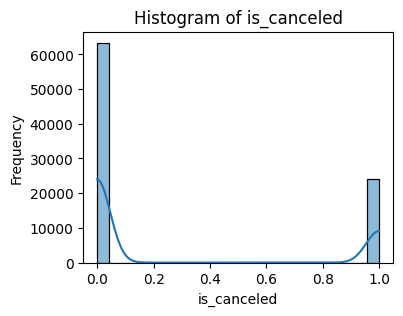

Descriptive statistics of is_canceled
count    87396.000000
mean         0.274898
std          0.446466
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64



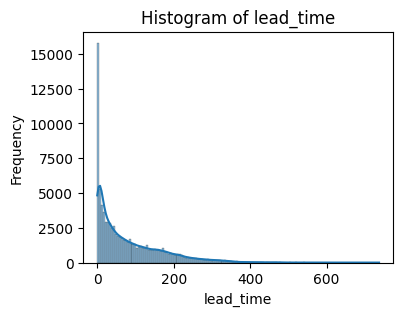

Descriptive statistics of lead_time
count    87396.000000
mean        79.891368
std         86.052325
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64



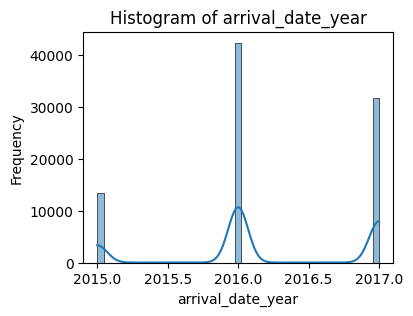

Descriptive statistics of arrival_date_year
count    87396.000000
mean      2016.210296
std          0.686102
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64



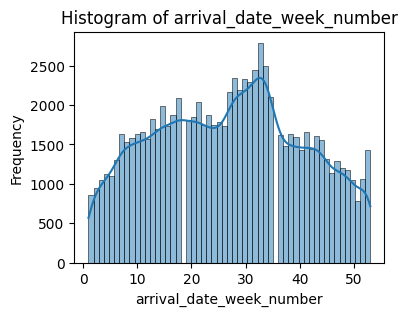

Descriptive statistics of arrival_date_week_number
count    87396.000000
mean        26.838334
std         13.674572
min          1.000000
25%         16.000000
50%         27.000000
75%         37.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64



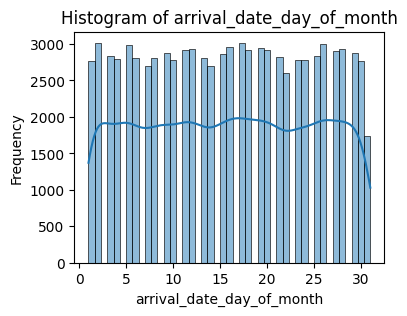

Descriptive statistics of arrival_date_day_of_month
count    87396.000000
mean        15.815541
std          8.835146
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64



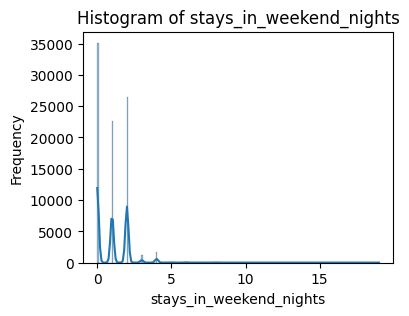

Descriptive statistics of stays_in_weekend_nights
count    87396.000000
mean         1.005263
std          1.031921
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64



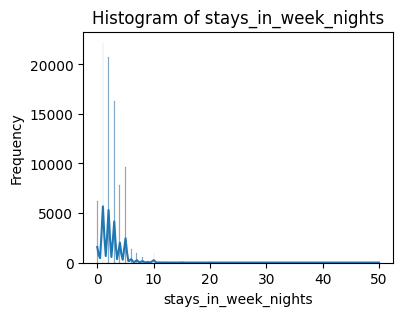

Descriptive statistics of stays_in_week_nights
count    87396.000000
mean         2.625395
std          2.053584
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64



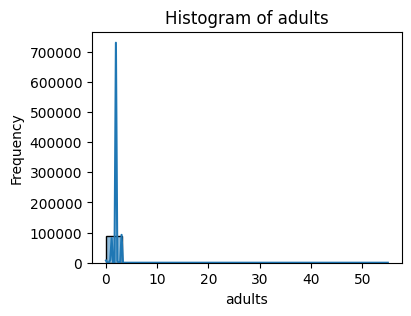

Descriptive statistics of adults
count    87396.000000
mean         1.875795
std          0.626500
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64



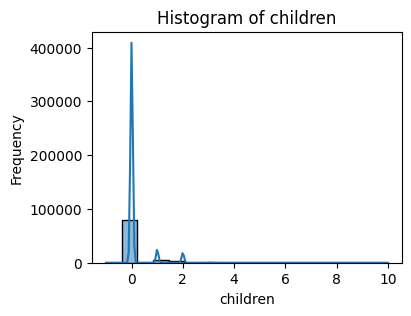

Descriptive statistics of children
count    87396.000000
mean         0.138588
std          0.455936
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64



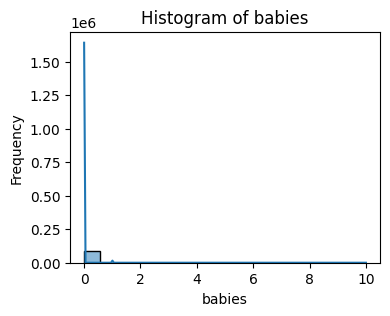

Descriptive statistics of babies
count    87396.000000
mean         0.010824
std          0.113597
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64



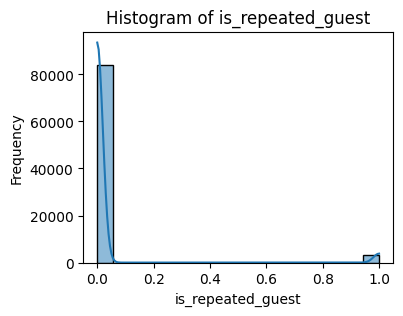

Descriptive statistics of is_repeated_guest
count    87396.000000
mean         0.039075
std          0.193775
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_repeated_guest, dtype: float64



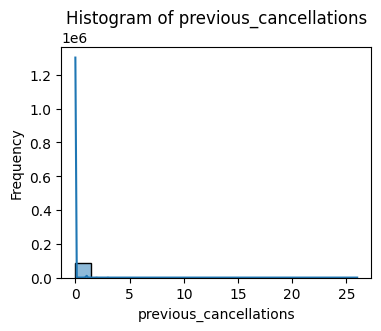

Descriptive statistics of previous_cancellations
count    87396.000000
mean         0.030413
std          0.369145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64



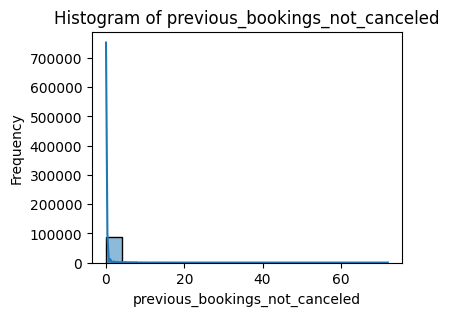

Descriptive statistics of previous_bookings_not_canceled
count    87396.000000
mean         0.183990
std          1.731894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         72.000000
Name: previous_bookings_not_canceled, dtype: float64



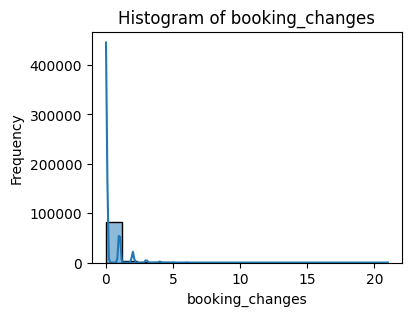

Descriptive statistics of booking_changes
count    87396.000000
mean         0.271603
std          0.727245
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: booking_changes, dtype: float64



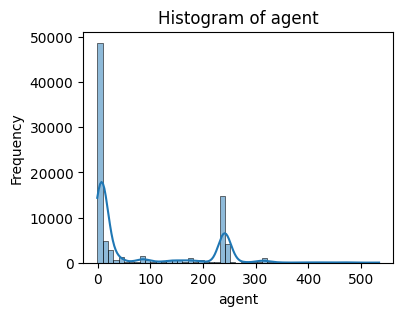

Descriptive statistics of agent
count    87396.000000
mean        80.865143
std        110.048927
min         -1.000000
25%          9.000000
50%          9.000000
75%        234.000000
max        535.000000
Name: agent, dtype: float64



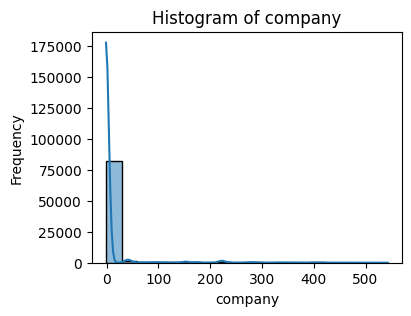

Descriptive statistics of company
count    87396.000000
mean        10.076983
std         54.239239
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        543.000000
Name: company, dtype: float64



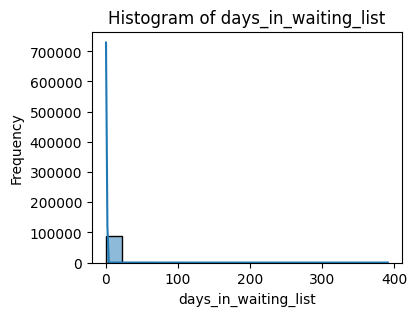

Descriptive statistics of days_in_waiting_list
count    87396.000000
mean         0.749565
std         10.015731
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64



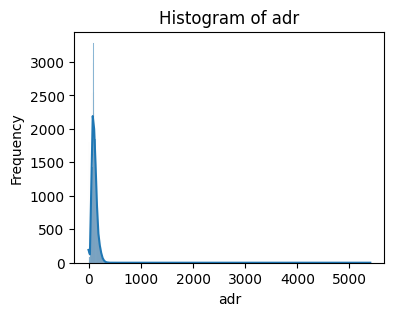

Descriptive statistics of adr
count    87396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64



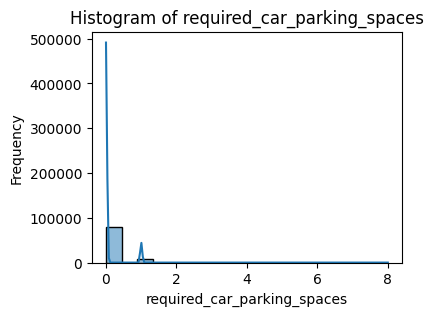

Descriptive statistics of required_car_parking_spaces
count    87396.000000
mean         0.084226
std          0.281533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64



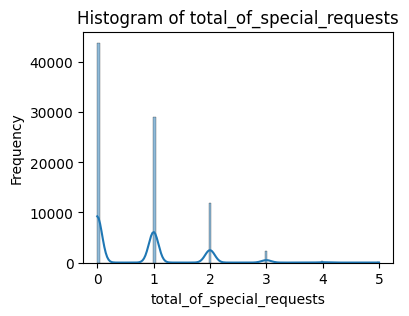

Descriptive statistics of total_of_special_requests
count    87396.000000
mean         0.698567
std          0.831946
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64



In [74]:
for col in num_list:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    print("Descriptive statistics of", col)
    print(df[col].describe())
    print()

## **III. EDA 2D** <a class="anchor" id="c3"></a>

### **1. Phân tích hệ số tương quan giữa các biến num** <a class="anchor" id="c31"></a>

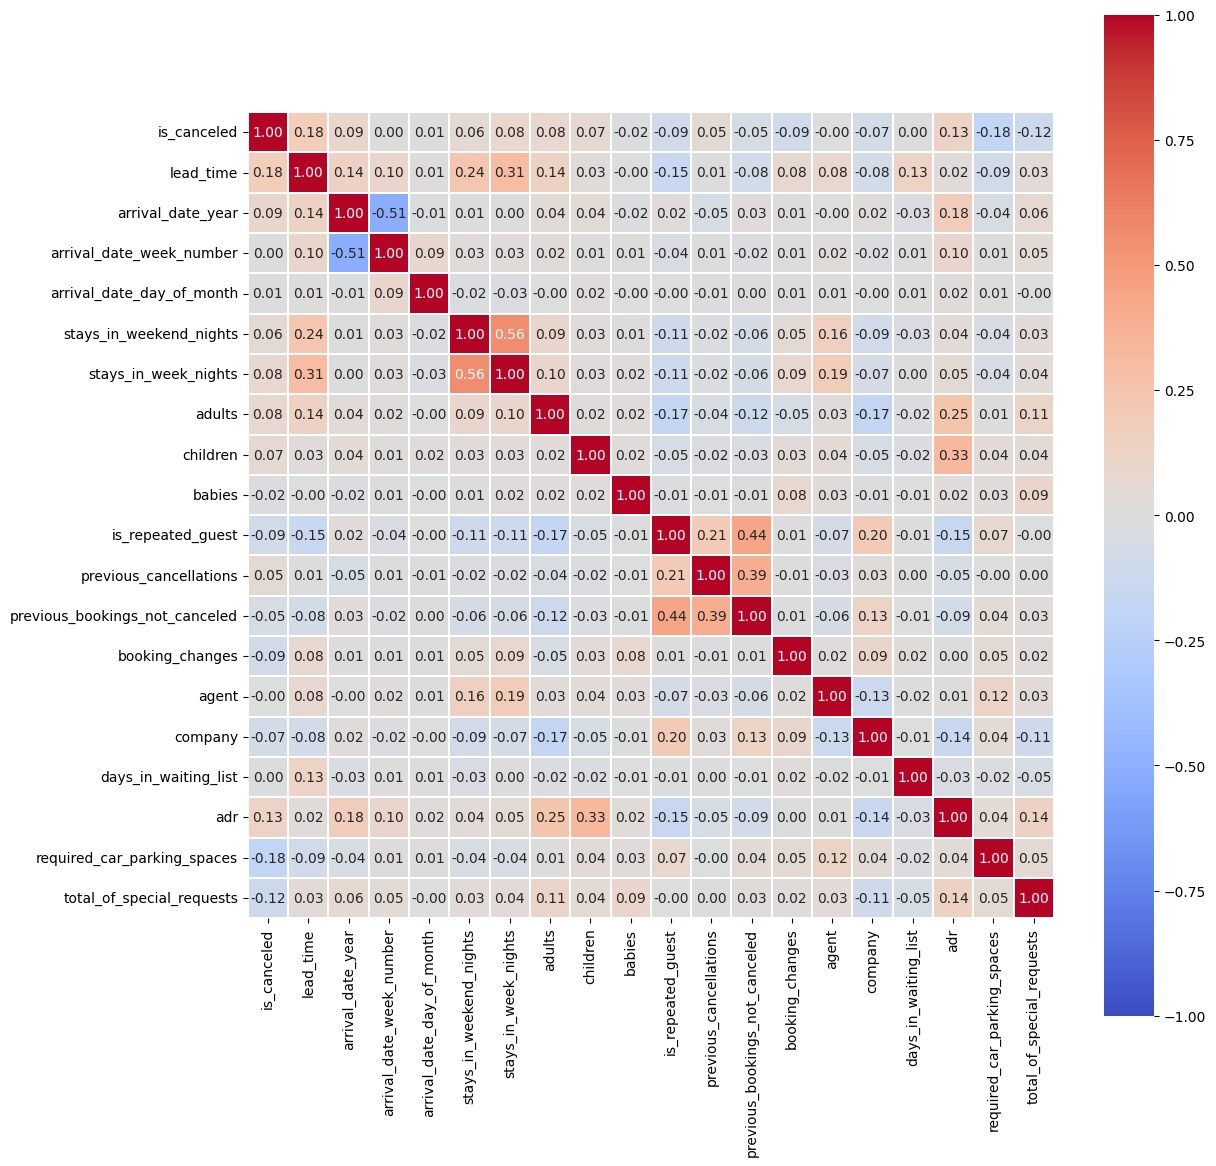

In [84]:
fig, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(df[num_list].corr(), annot=True, cmap="coolwarm", linewidths=.1, fmt=".2f", square=True, vmin=-1)

### **2. Sử dụng Scatter plot để phân tích dữ liệu 2D** <a class="anchor" id="c32"></a>

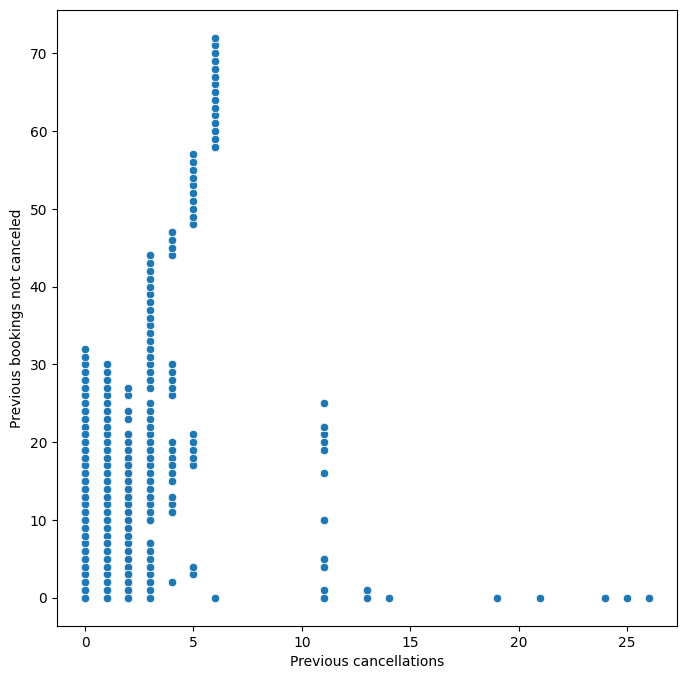

In [119]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled")
plt.xlabel('Previous cancellations')
plt.ylabel('Previous bookings not canceled')
plt.show()

### **3. Sử dụng bar chart để phân tích dữ liệu num và cate** <a class="anchor" id="c33"></a>

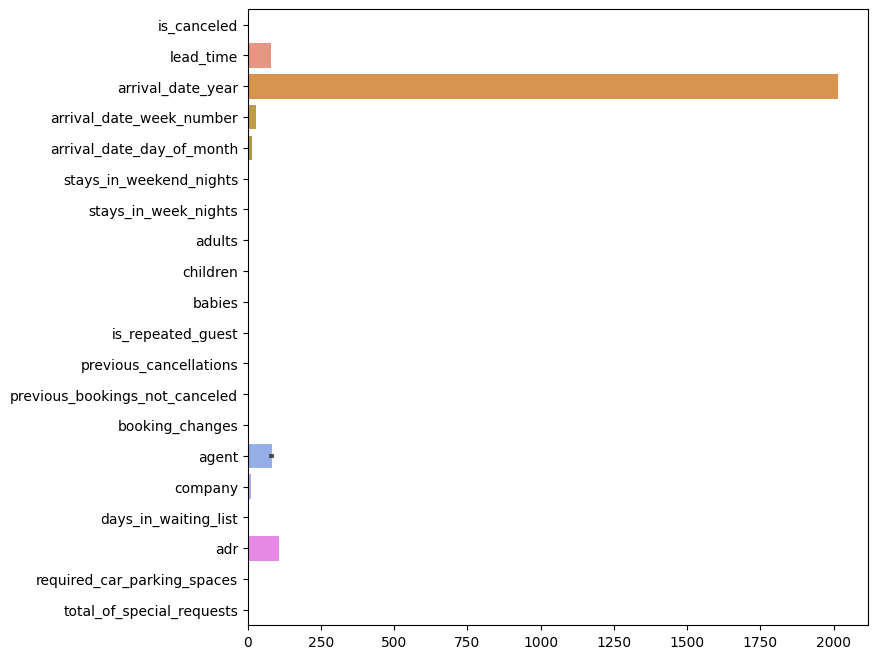

In [117]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.barplot(data=df[num_list], orient='h')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.barplot(df[cate_list], orient='h')

### **4. Tính tỷ trọng đối với hai biến cate** <a class="anchor" id="c34"></a>

## **IV. EDA 3D** <a class="anchor" id="c4"></a>

### **1. Sử dụng Scatter plot để phân tích dữ liệu 3D cho ba biến num** <a class="anchor" id="c41"></a>

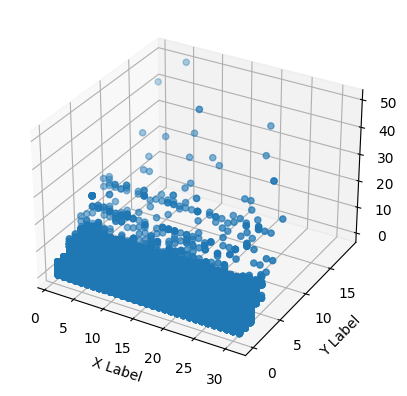

In [103]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df[num_list[4]], df[num_list[5]], df[num_list[6]])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### **2. Sử dụng Scatter plot 2D và màu đối với hai biến num và cate** <a class="anchor" id="c42"></a>

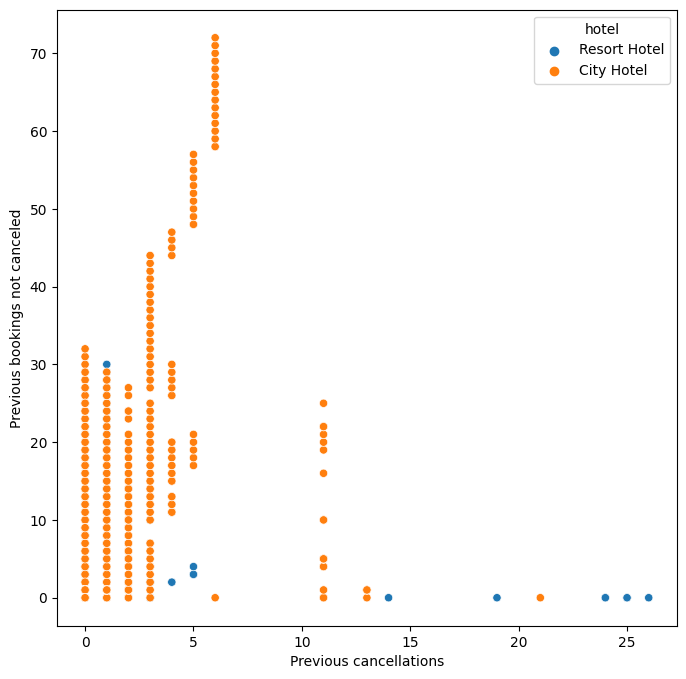

In [122]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled", hue=cate_list[0])
plt.xlabel('Previous cancellations')
plt.ylabel('Previous bookings not canceled')
plt.show()

### **3. Tính tỷ trọng theo bin chia theo thể loại với hai biến cate** <a class="anchor" id="c43"></a>

## **V. Insight** <a class="anchor" id="c5"></a>